In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [5]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [6]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [7]:
passmark = 40

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

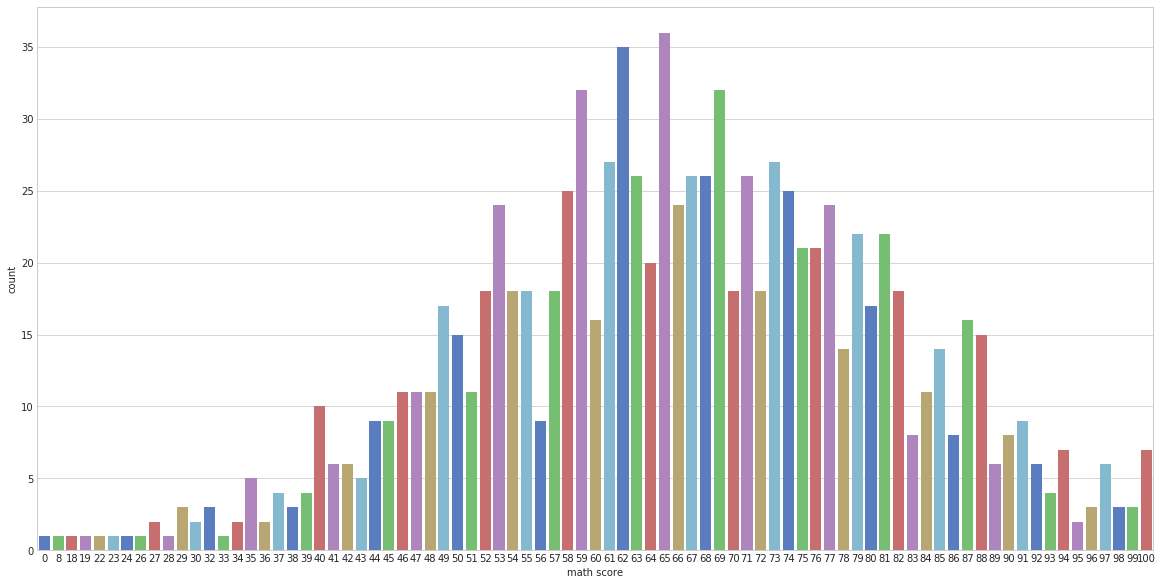

In [9]:
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
sns.countplot(x='math score',data=data,palette='muted')

In [11]:
data['Math_PassStatus']=np.where(data['math score']<passmark,'F','P')
data['Math_PassStatus'].value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

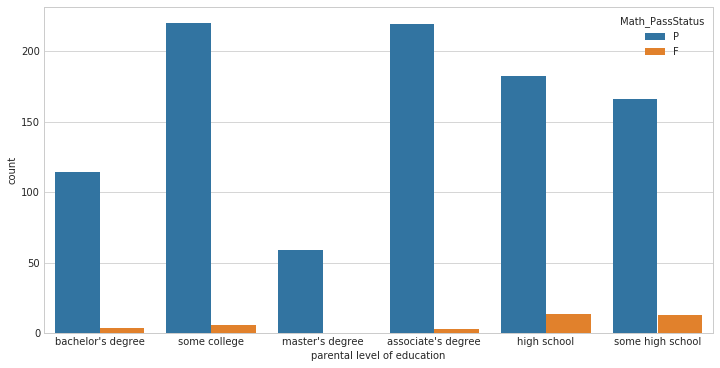

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=data,hue='Math_PassStatus')

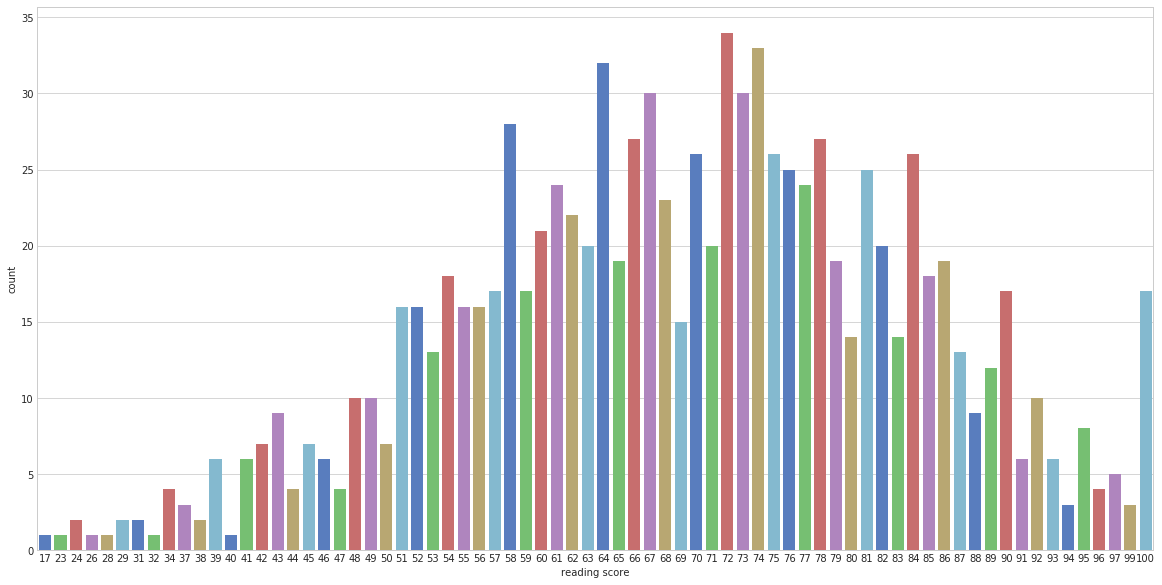

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='reading score',data=data,palette='muted')

In [14]:
data['Reading_PassStatus']=np.where(data['reading score']<passmark,'F','P')
data['Reading_PassStatus'].value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

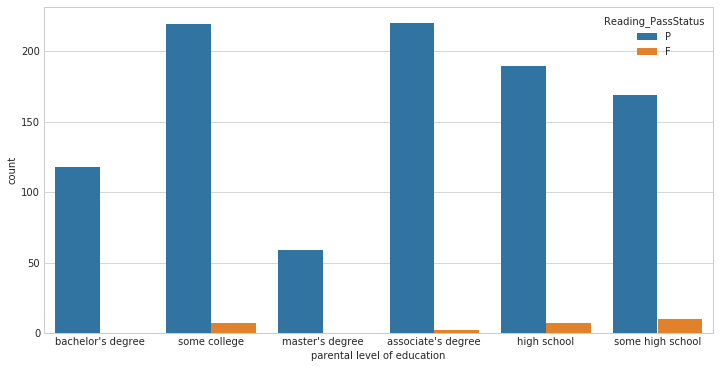

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=data,hue='Reading_PassStatus')

In [16]:
data['Writing_PassStatus']=np.where(data['writing score']<passmark,'F','P')
data['Writing_PassStatus'].value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

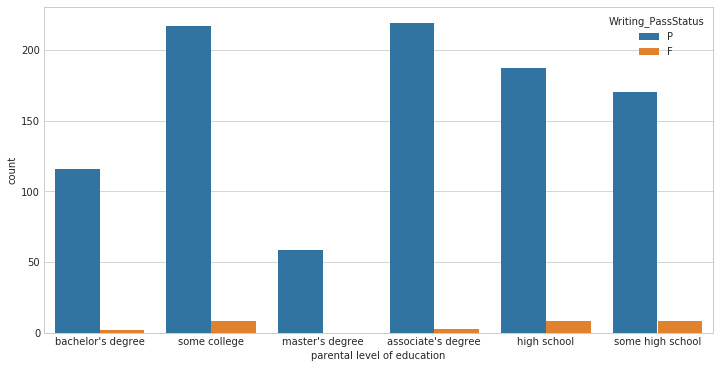

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=data,hue='Writing_PassStatus')

In [18]:
data['Overall_PassStatus']=data.apply(lambda x: 'F' if x['Math_PassStatus']=='F' or 
                                     x['Reading_PassStatus']=='F' or x['Writing_PassStatus']=='F' else 'P', axis=1)
data['Overall_PassStatus'].value_counts()

P    949
F     51
Name: Overall_PassStatus, dtype: int64

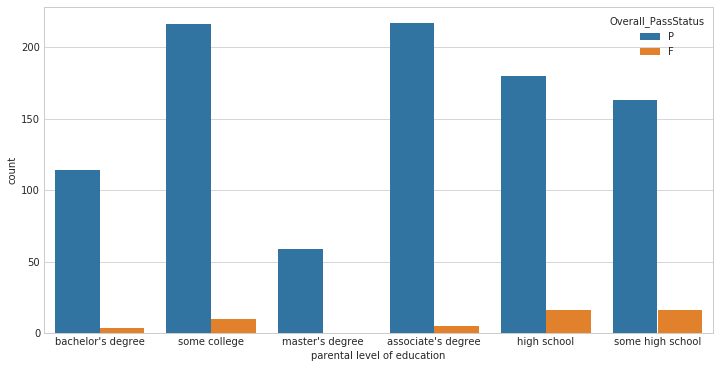

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=data,hue='Overall_PassStatus')

In [20]:
data['Total Marks']=data['math score']+data['writing score']+data['reading score']
data['Percentage']=(data['Total Marks']/3)

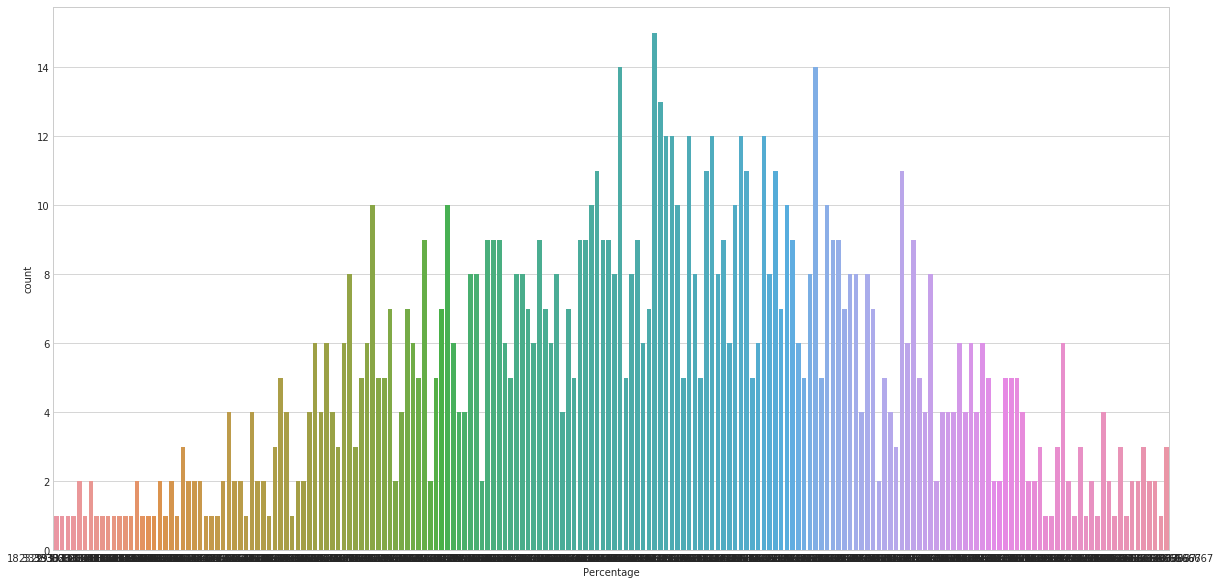

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='Percentage',data=data)

In [23]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(lambda x : GetGrade(x['Percentage'], x['Overall_PassStatus']), axis=1)

data['Grade'].value_counts()


B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

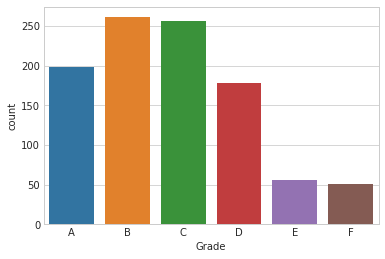

In [24]:
sns.countplot(x='Grade',order=['A','B','C','D','E','F'],data=data)

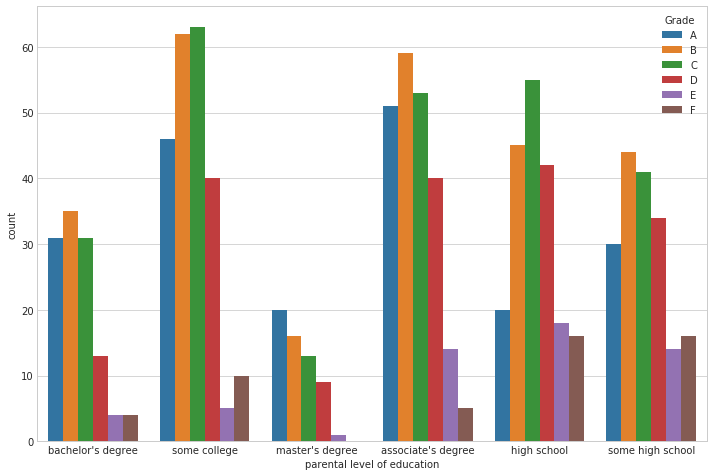

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x='parental level of education', data=data, hue='Grade',hue_order=['A','B','C','D','E','F'])